<a href="https://colab.research.google.com/github/arsi-87/ml-final-project/blob/main/notebook/AS_ML_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finalni Projekat

### Cilj projekta
Cilj ovog projekta je razvijanje modela masinskog ucenja koji ce automatski predlagati odgovarajucu kategoriju za svaki novi proizvod na osnovu njegovog naziva.
Ovaj model treba da omoguci da svaki novi artikal dobije odgovarajucu kategoriju,sto ubrzava rad citavog tima,olaksava pretragu i unapredjuje iskustvo korisnika na sajtu.

### Ucitavanje i provera podataka
Pre nego sto krenemo u analizu,prvo cemo ucitati podatke direktno sa naseg GitHuba-a i pogledati strukuturu podataka.
U ovom koraku cemo:
- Ucitati csv fajl sa GitHub-a
- Prikazati koliko ima redova
- Prikazati prvih 5 redova
- Videti tipove podataka i osnovne podatke kolona

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/arsi-87/ml-final-project/main/data/products.csv"

df = pd.read_csv(url)

print("Dataset shape(rows, columns):", df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset info:")
df.info()


Dataset shape(rows, columns): (35311, 8)

First 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


### Provera nedostajucih vrednosti
Nedostajuce vrednosti predstavljaju veliki problem za model masinskog ucenja,jer model ne moze se istrenira pravilno i moze da da pogrsne rezultata. Zato cemo u ovom kodu prebrojati sve nedostajuce vrednosti u kolonama

In [3]:
print(df.isna().sum())


product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


## Analiza i vizualizacija kolone 'Category Label'
U ovom delu cemo vise paznje posvetiti koloni 'Category Label',jer je ona u ovom skupu podataka najvaznija jer sadrzi vrednosti na osnovu kojih ce model predvidjati rezultate.


In [4]:
#Proveravamo koje vrednosti postoje u 'Category Label'

category_count = df[' Category Label'].value_counts()
print(category_count)

print(df[' Category Label'].dtypes)


 Category Label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64
object


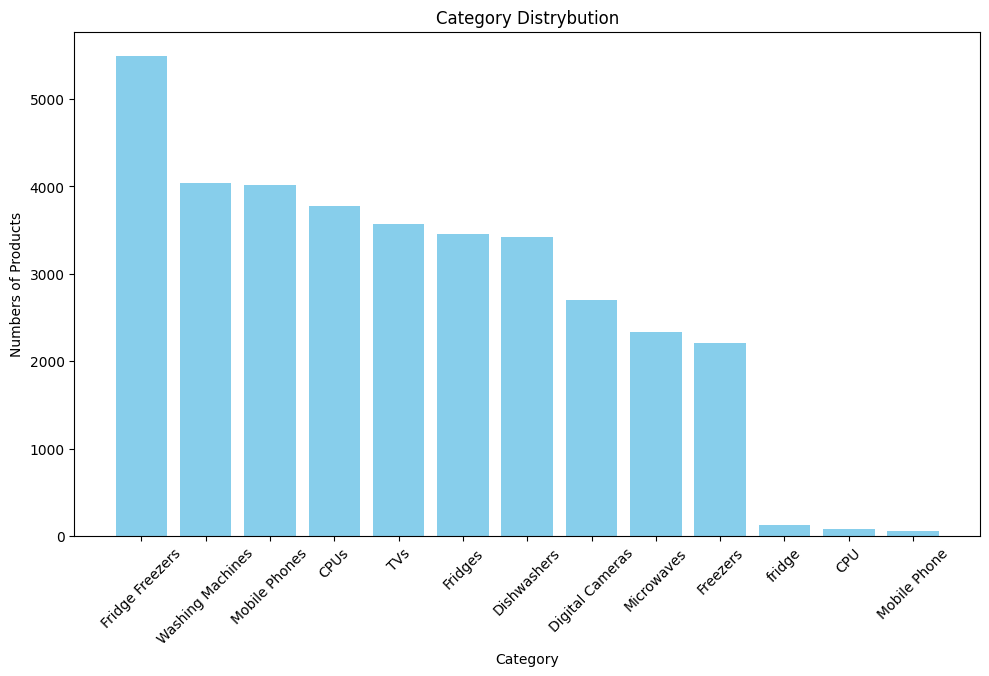

In [8]:
from numpy import rot90
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.bar(category_count.index, category_count.values, color= "skyblue")
plt.title("Category Distrybution")
plt.xlabel("Category")
plt.ylabel("Numbers of Products")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()